In [1]:
import numpy as np
from matplotlib import  pyplot as plt

Tentative de comprendre si l'ajout du bruit aléatoire (random noise) permet de baisser la variance.

# Anisotropy vs  Anisotropy+Noise

In [2]:
anisotropy =       np.array([0.7,  0.85, 0.89, 0.82, 0.65, 0.87, 0.92,   0.32, 0.4,  0.19])
anisotropy_noise = np.array([0.72, 0.71, 0.79, 0.73, 0.86, 0.82, 0.88,   0.16, 0.27, 0.15])

In [3]:
print(f"anisotropy var sur toutes les images: {np.var(anisotropy)}")
print(f"anisotropy_noise var sur toutes les images: {np.var(anisotropy_noise)}")

anisotropy var sur toutes les images: 0.063209
anisotropy_noise var sur toutes les images: 0.07780899999999999


In [4]:
print(f"anisotropy var sur 7 premières images: {np.var(anisotropy[:7])}")
print(f"anisotropy_noise var sur 7 premières images: {np.var(anisotropy_noise[:7])}")

anisotropy var sur 7 premières images: 0.008767346938775513
anisotropy_noise var sur 7 premières images: 0.004106122448979593


In [5]:
np.var(anisotropy[:7])/np.var(anisotropy_noise[:7])

2.1351888667992047

In [6]:
print(f"anisotropy var sur 3 dernières images: {np.var(anisotropy[7:])}")
print(f"anisotropy_noise var sur 3 dernières images: {np.var(anisotropy_noise[7:])}")

anisotropy var sur 3 dernières images: 0.0074888888888888895
anisotropy_noise var sur 3 dernières images: 0.0029555555555555563


In [7]:
np.var(anisotropy[7:])/np.var(anisotropy_noise[7:])

2.533834586466165

In [8]:
mean_anisotropy = np.mean(anisotropy)
mean_anisotropy_noise = np.mean(anisotropy_noise)
means = np.array((mean_anisotropy,mean_anisotropy_noise))
means

array([0.661, 0.609])

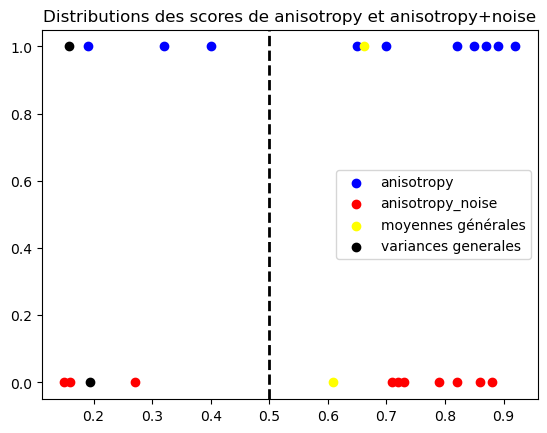

In [25]:
plt.scatter(anisotropy, np.ones(anisotropy.shape), color="blue", label="anisotropy")
plt.scatter(anisotropy_noise, np.zeros(anisotropy.shape), color="red", label="anisotropy_noise")
plt.scatter(means, [1,0], color="yellow", label="moyennes générales")
plt.scatter([2.5*np.var(anisotropy), 2.5*np.var(anisotropy_noise)], [1,0], color="black", label="variances generales")
plt.axvline(x=0.5, color='black', linestyle='--', linewidth=2)
plt.title("Distributions des scores de anisotropy et anisotropy+noise")

plt.legend()

# Gamma vs Gamma+Noise

In [10]:
gamma =       np.array([0.35, 0.81, 0.83, 0.86, 0.67, 0.91, 0.85,    0.2,  0.23, 0.24])
gamma_noise = np.array([0.81, 0.87, 0.89, 0.9,  0.72, 0.92, 0.91,    0.41, 0.51, 0.21])

In [11]:
print(f"gamma var sur toutes les images: {np.var(gamma)}")
print(f"gamma_noise var sur toutes les images: {np.var(gamma_noise)}")

gamma var sur toutes les images: 0.081685
gamma_noise var sur toutes les images: 0.056805000000000015


In [12]:
print(f"gamma var sur 7 premières images: {np.var(gamma[:7])}")
print(f"gamma_noise var sur 7 premières images: {np.var(gamma_noise[:7])}")

gamma var sur 7 premières images: 0.03199591836734694
gamma_noise var sur 7 premières images: 0.004400000000000002


In [13]:
print(f"gamma var sur 3 dernières images: {np.var(gamma[7:])}")
print(f"gamma_noise var sur 3 dernières images: {np.var(gamma_noise[7:])}")

gamma var sur 3 dernières images: 0.00028888888888888866
gamma_noise var sur 3 dernières images: 0.015555555555555559


In [14]:
mean_gamma = np.mean(gamma)
mean_gamma_noise = np.mean(gamma_noise)
means2 = np.array((mean_gamma,mean_gamma_noise))
means2

array([0.595, 0.715])

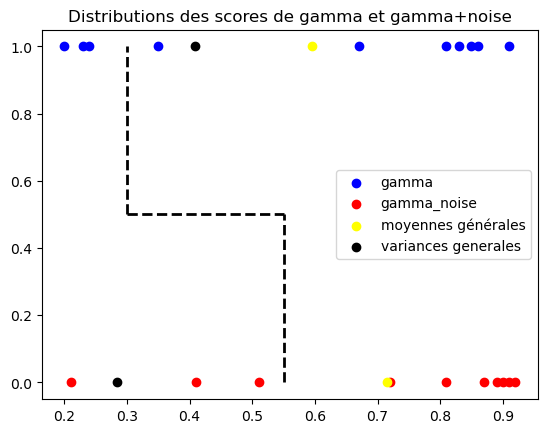

In [19]:
plt.scatter(gamma, np.ones(gamma.shape), color="blue", label="gamma")
plt.scatter(gamma_noise, np.zeros(gamma.shape), color="red", label="gamma_noise")
plt.scatter(means2, [1,0], color="yellow", label="moyennes générales")
plt.scatter([5*np.var(gamma), 5*np.var(gamma_noise)], [1,0], color="black", label="variances generales")
plt.vlines(x=0.55, ymin=0, ymax=0.5, color='black', linestyle='--', linewidth=2)
plt.vlines(x=0.3, ymin=0.5, ymax=1, color='black', linestyle='--', linewidth=2)
plt.hlines(y=0.5, xmin=0.3, xmax=0.55, color='black', linestyle='--', linewidth=2)
plt.title("Distributions des scores de gamma et gamma+noise")
plt.legend()

# Conclusion

Pour l'instant on ne peut pas conclure grand chose car dans le cas de l'anisotropie on de plus faibles variances sur les sous-datasets avec l'ajout du bruit mais une plus grande sur le dataset entier, et ce car le modèle a de mauvaises performances sur les 3 dernières images.

Dans le cas de Gamma+noise, la variance est visiblement supérieure dans le sous-dataset de 3 images, ce qui suggère une mauvaise généralisation, mais elle est inférieure dans l'autre, pour une variance générale inférieure.


Il faudrait faire des tests  plus poussés (T-test par exemple) essayer peut-être plus de combinaisons 